# Trabalho 01 Machine Learning

### Primeira Parte

##### KMeans
Foi implementado as funções abaixo para a execução do método de clusterização Kmeans.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn.preprocessing as sk

#Kmeans 
def kmeans(data, k):
    cl = [0]*len(data) #vetor com clusters de cada dado
    features = len(data[0])
    centers = find_center(data,k,features)#centros iniciais
    while True: 
        cl = clusters(data, centers ,cl) #monta os clusters
        old_centers = centers.copy() 
        new_centers(features, data, centers , cl)#calcula os novos centros
        if old_centers == centers:
            break
    return (centers,cl)
   
#Retorna posições aleatórias para os centros de cluster 
##range (menor valor entre os dados, menor valor entre os maiores valores de dado de cada feature)
def find_center(data,k,f):
    d = np.array(data)
    min_data = d.min(axis = 0)
    max_data = d.max(axis = 0)
    centers = []
    for i in range(k):
        centers.append([])
        for j in range(f):
            centers[i].append(random.randrange(int(min_data.min()), int(max_data.min())))
    return centers
    
#Percorre todos os dados escolhendo o cluster qual ele faz parte 
#de acordo com a menor distância entre ele e o centro dos clusters
def clusters(data, centers, cl):
    dist = [0]*len(centers)
    for i in range(len(data)):
        for j in range (len(centers)):
            dist[j] = math.dist(data[i],centers[j])
        cl[i] = dist.index(min(dist))
    return cl
        
    
#Percorre todos os dados de um cluster x e calcula o ponto médio entre esses dados
#tornando esse ponto o novo centro do cluster x
def new_centers(features, data, centers, cl):
    mid_point = np.zeros((len(centers),features))
    num = [0]*len(centers)
    for i in range(len(data)):
        a= cl[i]
        for j in range(features):
            mid_point[a][j] = mid_point[a][j] + data[i][j]
        num[a] += 1
 
    for i in range(len(centers)):
        if(num[i] != 0):
            centers[i]= [j/num[i] for j in mid_point[i]]




Utilizamos a distância entre pontos como métrica de distânciamento entre os dados e os clusters.

Além das funções necessárias para o Kmeans foi necessária a implementação de outras funções para atender nossas necessidades. Os dados são separados de forma que 90% deles fazem parte do conjunto de dados utilizados para o treinamento do nosso aprendizado não supervisionado e os 10% restantes são usados para testar e avaliar a corretude da aprendizagem do sistema.
Para determinarmos o número de clusters implementamos o método do cotovelo (Elbow Method).
Como o primeiro conjunto de dados que utilizamos (cluster.dat) possuí valores muito driscrepantes de uma feature para outra, utilizamos o RobustScaler como pré-processamento de padronização dos dados.

In [2]:
#Divide o conjunto de dados em treinamento e teste
#data -> conjunto de treinamento 90% dos dados
#test_data -> conjunto de teste 10% dos dados
def data_div(data):
    n_data = len(data)
    n_test = int(n_data * 0.1)
    test_data = []
    for i in range(n_test):
        j = random.randint(0,n_data-1)
        test_data.append(data.pop(j))
        n_data = len(data)
    return (data,test_data)

#Test
## Recebe o conjunto de dado teste e classifica eles de acordo com 
## clusters encontrados durante o treinamento na função kmeans
def test (data, centers):
    cl = [0]*len(data)
    clusters(data, centers, cl)
    return data, cl


#plota os dados de acordo com seus clusters
def plot_data(data,centers, cl):
    points_shape = ["b.","g.","c.","m.","y.","k.","bv","gv",
              "cv","mv","yv","kv","bs","gs","cs","ms","ys",
              "ks","b1","g1","c1","m1","y1","k1","b*",
              "g*","c*","m*","y*","k*","bo","go","co","mo",
              "yo","ko","b+","g+","c+","m+","y+","k+"]
    if (centers == None):
        plt.plot(list(zip(*data))[0], list(zip(*data))[1],points_shape[0])
    else:
        for i in range(len(data)):
            if(cl[i] >= len(points_shape)):
                plt.plot(data[i][0], data[i][1],points_shape[cl[i] % len(points_shape)])
            else:
                plt.plot(data[i][0], data[i][1],points_shape[cl[i]])
        plt.plot(list(zip(*centers))[0], list(zip(*centers))[1],"ro")
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()
    
def elbow_method(data,n):
    features = len(data[0])
    j_function = [0]*n
    for x in range(1,n+1):
        c,cl = kmeans(data, x)
        for j in range(x):
            for i in range(len(data)):
                if(cl[i] == j):
                    j_function[x-1] +=  (math.dist(data[i],c[j]))**2
    x = [i for i in range(1,n+1)]
    plt.plot(x, j_function)
    plt.ylabel('Cost of Function J')
    plt.xlabel('Number of clusters')
    plt.show()

def robustscaler(data):
    #RobustScaler
    t = sk.RobustScaler().fit(data)
    data = t.transform(data)
    data = data.tolist()
    return data


Primeiro conjunto de dados (cluster.dat):

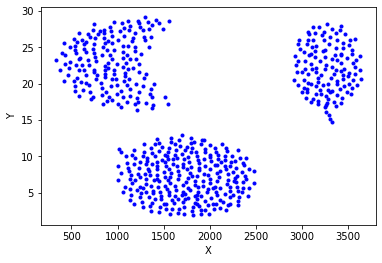

In [3]:
    data = [i.strip().split() for i in open("cluster.dat").readlines()]
    for i in range(len(data)):
        data[i] = [float(j) for j in data[i]]
    cl = [0]*len(data)
    plot_data(data,None,cl) #plota os dados
    
    

Para analizarmos a necessidade do pré-processamento dos dados e como isso afeta no resultado do treinamento podemos comparar a execução do Kmeans nesse conjunto de dados com e sem o pré-processamento. Primeiramente realizaremos o treinamento sem usar o RobustScaler nos dados.  O primeiro gráfico trata-se da curva de custo da função J pelo número de cluster, e analisando pelo método do cotovelo vemos que a melhor opção para o número de clusters é 3. O segundo gráfico mostra a clusterização realizada pelo nosso treinamento e o terceiro mostra como foi clusterizado o nosso conjunto de dados testes. É possível observar que a clusterização realizada não parece a melhor quando observamos a densidade dos dados, isso porque como os valores de X são muito maiores que os valores de Y o cálculo da distância realizado dentro do Kmeans para definir de qual cluster cada ponto faz parte dá muito mais relevância para os valores de X. Por isso é possível observar que os clusters estão separados levando em conta sua disposição pelo eixo X, de forma que sua posição em Y pouco importa. 

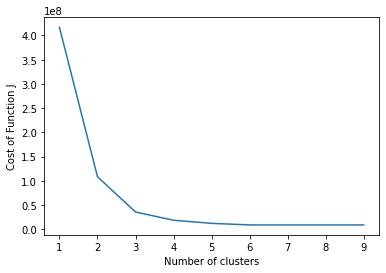

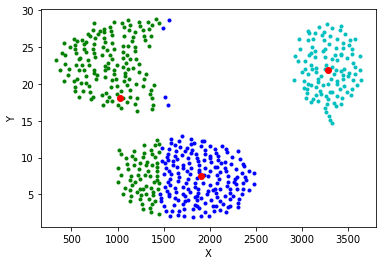

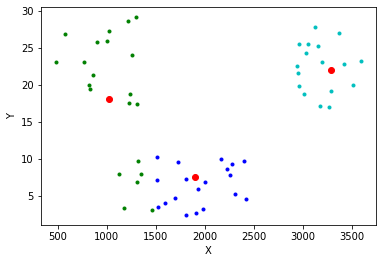

In [4]:
    data,test_data = data_div(data)#divide base de treinamento da base de teste
    elbow_method(data,9)#Plota método do cotovelo
    centers,cl = kmeans(data, 3) #Kmeans
    plot_data(data,centers,cl)#plota os clusters e os centros
    test_data,cl_test = test(test_data, centers) #teste 
    plot_data(test_data,centers,cl_test)#plota o teste

Realizando o pré-processamento de dados com o Robustscaler observamos que a padronização dos dados leva a uma clusterização mais precisa, que considera igualmente o posicionamento tanto no eixo X quanto no eixo Y. 

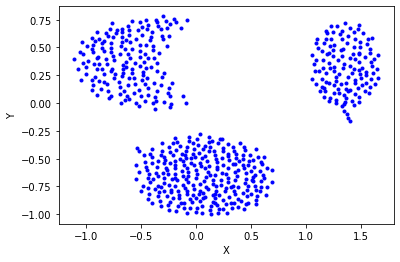

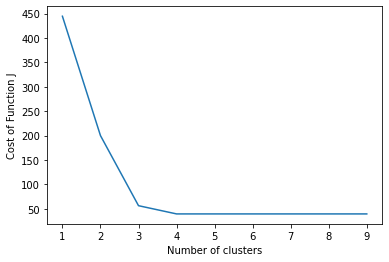

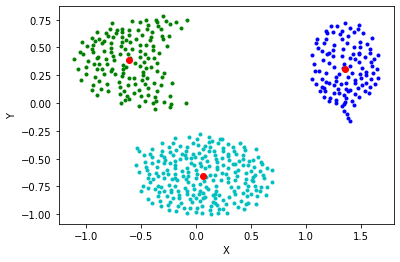

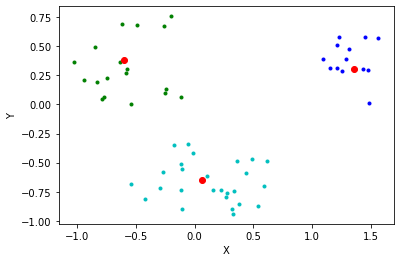

In [5]:
    data = [i.strip().split() for i in open("cluster.dat").readlines()]
    for i in range(len(data)):
        data[i] = [float(j) for j in data[i]]
    cl = [0]*len(data)
    data = robustscaler(data)
    plot_data(data,None,cl) #plota os dados padronizados
    data,test_data = data_div(data)#divide base de treinamento da base de teste
    elbow_method(data,9)#Plota método do cotovelo
    centers,cl = kmeans(data, 3)
    plot_data(data,centers,cl)#plota os clusters e os centros
    test_data,cl_test = test(test_data, centers)
    plot_data(test_data,centers,cl_test)#plota o teste

Para a escolha dos centros de cluster iniciais optamos por fazer de forma aleatória, considerando valores entre o menor valor dos dados e o menor valor entre os maiores valores de dados de cada featuere, para que as variações muito grandes dos dados não atrapalhem o agrupamento correto, o que ocorreria se deixassemos uma escolha aleatória entre todos os valores alcancáveis pelo range dos dados. 

Para mostrar isso podemos considerar as funções de exemplo abaixo:

In [6]:
#Kmeans 2 
##exemplo 
def kmeans2(data, k):
    cl = [0]*len(data) #vetor com clusters de cada dado
    features = len(data[0])
    centers = find_center2(data,k,features)#centros iniciais
    while True: 
        cl = clusters(data, centers ,cl) #monta os clusters
        old_centers = centers.copy() 
        new_centers(features, data, centers , cl)#calcula os novos centros
        if old_centers == centers:
            break
    return (centers,cl)

#Retorna posições aleatórias para os centros de cluster 
##range (menor valor entre os dados,  maior valor entre os dados)
def find_center2(data,k,f):
    d = np.array(data)
    min_data = d.min(axis = 0)
    max_data = d.max(axis = 0)
    centers = []
    for i in range(k):
        centers.append([])
        for j in range(f):
            centers[i].append(random.randrange(int(min_data.min()), int(max_data.max())))
    return centers


Podemos comparar o problema de inicialização de centros de clusters rodando o código abaixo e comparando as saídas. O primeiro gráfico representa a clusterização do conjunto de dados cluster.dat quando nos preocupamos em limitar a escolha aleatória e o segunda é a mesma clusterização mas com os centros de cluster escolhidos aleatóriamente entre todos os valores possiveis de dados. 

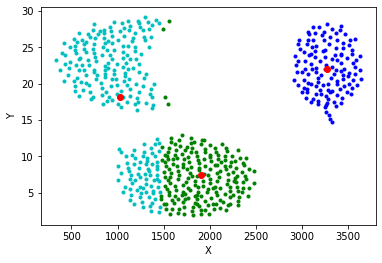

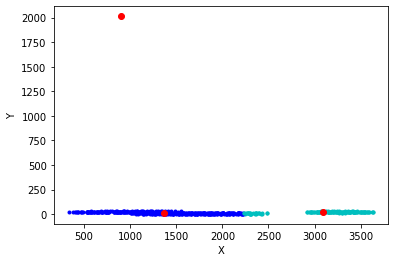

In [7]:
    data = [i.strip().split() for i in open("cluster.dat").readlines()]
    for i in range(len(data)):
        data[i] = [float(j) for j in data[i]]
    cl = [0]*len(data)
    centers,cl = kmeans(data, 3) #Kmeans
    plot_data(data,centers,cl)#plota os clusters e os centros
    centers,cl = kmeans2(data, 3) #Kmeans
    plot_data(data,centers,cl)#plota os clusters e os centros

##### DBSCAN
Como segundo método de aprendizado não supervisionado escolhemos o algorítmo DBSCAN, que agrupa os dados de acordo com a densidade e não é afetado por ruídos. Para esse algorítimo utilizamos o mesmo método de separação de dados, 90% dos dados são usados para treinamento e 10% são usador para teste. 

In [8]:
import math
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk
import numpy as np
import random

# 0 = undefined
#-1 = noise
#DBSCAN
##Agrupa os dados de acordo com a densidade
def DBSCAN(data, eps, minPts):
    c = 0
    core = []
    classification = [0]*len(data)
    plot_data(classification,data)
    for i in range(len(data)):
        neighbors =[]
        if (classification[i]==0):
            neighbors = rangeQuery(data, data[i], eps) #encontra os pontos "vizinhos"(a uma distiância <= eps do ponto data[i])
            if (len(neighbors)<minPts): 
                classification[i] = -1 #ponto é considerado "noise" se o número de vizinhos < minPts
            else:
                c += 1
                classification[i]  = c
                core.append(i) #ponto é considerado "core" se o número de vizinhos >= minPts
                s = neighbors.copy()
                s.remove(i)
                neighbors =[]
                for j in s:
                    classification[j]  = c
                while len(s)>0:
                    j = s[0]
                    results = rangeQuery(data, data[j], eps)
                    if(len(results)>=minPts):
                        core.append(j)
                        for i in range(len(results)):
                            point = results[i]
                            if ((classification[point]  == 0)or(classification[point]  == -1)):
                                if(classification[point]  == 0):
                                    s.append(point)
                                classification[point]  = c
                    s = s[1:]                   
    return (classification, core)

#Encontra os pontos que estão a uma distancia <= eps do ponto p
##pontos "vizinhos"
def rangeQuery(data, p, eps):
    n = []
    for i in range(len(data)):
        if ((dist_func(p,data[i])<= eps)):
            n.append(i)
    return n

#Retorna a distancia euclidiana entre os pontos p e q
def dist_func(p,q):
    p = np.array(p)
    q = np.array(q)
    return np.linalg.norm(p[0:2]-q[0:2])

#Pre-processamento de dados
def robustscaler(data):
    #RobustScaler
    t = sk.RobustScaler().fit(data)
    data = t.transform(data)
    data = data.tolist()
    return data

#Testa os dados para encontrar os clusters pertencentes
## dado um ponto acha os "vizinhos" dele, e classifica-o como parte do mesmo cluster do core vizinho mais perto
##caso não tenha nenhum core entre os vizinhos classifica-o como "Noise"
def test(t_data,data, eps, core, cl):
    classif = [0]*len(t_data)
    plot_data(classif,t_data)
    for i in range(len(t_data)):
        neighbors = rangeQuery(data, t_data[i], eps)
        min_dis = None
        for j in neighbors:
            if(j in core):
                if (min_dis == None):
                    min_dis = j  
                else:
                          
                    if((dist_func(data[j],t_data[i])))<(dist_func(data[min_dis],t_data[i])):
                        min_dis = j
        if (min_dis != None):
            classif[i] = cl[min_dis]
        else: 
            classif[i] = -1
    return classif
    
def data_div(data):
    n_data = len(data)
    n_test = int(n_data * 0.1)
    test_data = []
    for i in range(n_test):
        j = random.randint(0,n_data-1)
        test_data.append(data.pop(j))
        n_data = len(data)
    return (data,test_data)

#plot 
def plot_data(cl,data):
    points_shape = ["b.","g.","c.","m.","y.","k.","bv","gv",
              "cv","mv","yv","kv","bs","gs","cs","ms","ys",
              "ks","b1","g1","c1","m1","y1","k1","b*",
              "g*","c*","m*","y*","k*","bo","go","co","mo",
              "yo","ko","b+","g+","c+","m+","y+","r."]
    f = len(data[0])-1
    for i in range(len(data)):
        if(data[i][f] >= len(points_shape)):
            plt.plot(data[i][0], data[i][1],points_shape[cl[i] % len(points_shape)])
        else:
            plt.plot(data[i][0], data[i][1],points_shape[cl[i]])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()



Foi usado o mesmo conjunto de dados e, como visto acima, a melhor forma de lidar com os dados do arquivo cluster.dat é o pré-processamento com o RobustScaler. Usamos o valor 0,2 como valor de Eps e 3 como valor mínimo de pontos que estão a uma distância eps de um determinado ponto p. Esses são os melhores valores para esse conjunto de dados. 

Como esse método lida com agurpamento de densidade de dados não é preciso informar o número exato de clusters. O treinamento clusteriza os dados de forma precisa como é possível observar abaixo.


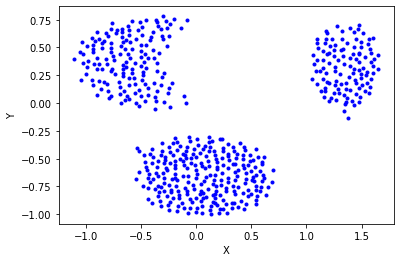

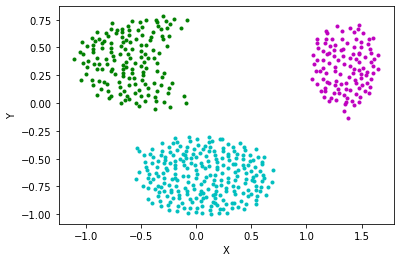

In [9]:
    data = [i.strip().split() for i in open("cluster.dat").readlines()]
    for i in range(len(data)):
        data[i] = [float(j) for j in data[i]]
    data = robustscaler(data)
    data, test_data = data_div(data)
    classif, core = DBSCAN(data, 0.2, 3)
    plot_data(classif,data)#plot clusters

Para a fase de teste também obtivemos o resultado esperado utilizando esse algoritimo. O primeiro gráfico abaixo é o conjunto separado para teste e o segundo é o mesmo conjunto, porem com as cores de seus devidos clusters. 

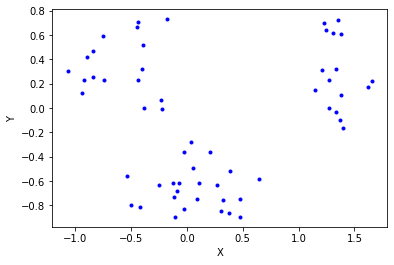

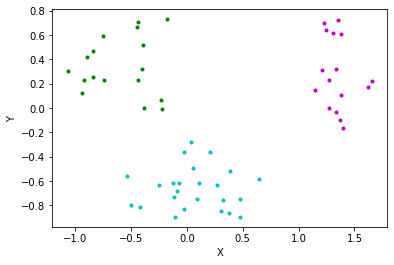

In [10]:
    cl_test = test(test_data, data, 0.2, core, classif)# realiza o teste
    plot_data(cl_test,test_data)#plota o teste

### Parte 2

##### Aplicando PCA em um novo dataset

Tratando-se da redução de dimensionalidade, escolhemos um conjunto de dados sobre o conteúdo disponível na plataforma da Netflix. Com o total de 7787 dados e 12 features ['show_id', 'type', 'title', 'director, 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'], nosso objetivo era de gerar clusters semelhantes a partir das features que revelassem mais informações sobre o conteúdo. Por isso escolhemos as features 'type', 'director', 'country', 'release_year', 'rating', 'duration' e 'listed_in' para basear nossas análises.

Como os dados contidos neste dataset não eram categóricos, foi necessário processá-los antes de aplicarmos k-means. Para isso utilizamos a função get_dummies da biblioteca Pandas, cujo resultado foi uma nova base de dados binária em que cada novo valor nos dados gerou uma nova feature. Esse processamento foi realizado sobre todos os dados disponíveis e ao final obtivemos 4614 features.

Apesar de não executarmos nenhuma operação de normalização sobre esses dados, a clusterização só foi possível de ser realizada por esse novo dataset ser binário.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kmeans import kmeans, data_div, plot_data, elbow_method, test

#Handle with non-categorical data
def dummies(data, features):

	newData = pd.DataFrame(columns=['A'])

	#Split data 'Country' in comma
	num = data['country'].str.join(sep='').str.get_dummies(sep=',')
	newData = pd.concat([newData, num], axis=1)

	#Split data 'listed_in' in comma
	num = data['listed_in'].str.join(sep='').str.get_dummies(sep=',')
	newData = pd.concat([newData, num], axis=1)

	#Get dummies features for analyses
	for i in features:
		num = pd.get_dummies(data.values[:, i], prefix_sep='_', drop_first=False)
		newData = pd.concat([newData, num], axis=1)

	return newData.drop('A', axis=1)

In [3]:
	#Receive data
	data = pd.read_csv("netflix_titles.csv", sep=',')

	#plot_data(data, None) 
	featuresOH = [1, 3, 7, 8, 9]
	data = dummies(data, featuresOH)

	#Split data into sets
	data = data.values.tolist()
	dataTraining, dataTest = data_div(data)

	#Turn into numpy array
	dataTraining = np.array(dataTraining)
	dataTest = np.array(dataTest)

##### Como o PCA afetou nossos resultados
Por estarmos lidando com um conjunto de dados de 4614 features, realizar k-means sem reduzir a dimensionalidade é algo extremamente custoso e que pode levar muito tempo, tornando-se inviável. Apesar de não ser o algoritmo ideal de redução para dados binários¹, ao aplicar o PCA para até 15 componentes chegamos em valores de variância muito próximo a zero (da ordem de 0.02).

In [2]:
#PCA training set
def applyPCAFit(rate, data):
	pca = PCA(n_components = rate)
	data = pca.fit_transform(data)
	var = pca.explained_variance_ratio_
	return data, var

def plotVariance(var):
	var = str(var).replace('\n', '').replace('[', '').replace(']', '').split(" ")
	var = ' '.join(var).split()

	for i in range(len(var)):
		var[i] = float(var[i])

	rates = range(len(var))
	plt.plot(rates, var)
	plt.ylabel('variance')
	plt.xlabel('n_components')
	plt.show()

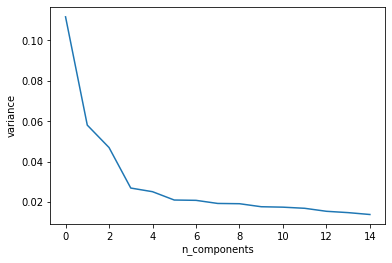

What is the best variance? 7


In [4]:
	#Finding best variance first 15
	dataPCATraining, var = applyPCAFit(15, dataTraining)
	plotVariance(var)
    
    #Find the best rate
	rate = int(input("What is the best variance? "))
	dataPCATraining, var = applyPCAFit(rate, dataTraining)

De acordo com a análise do gráfico, escolhemos realizar o PCA com base em 7 componentes e, para essa configuração, executamos o k-means para 50 possíveis valores de k, obtendo o seguinte gráfico entre a função objetiva e o valor de k:

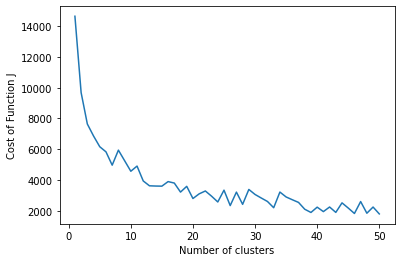

What is the best k? 19


In [5]:
	#Run K-means for 50 differents k and plot elbow graphic
	dataPCATraining = dataPCATraining.tolist()
	elbow_method(dataPCATraining, 50)

	#Find the best k
	k = input("What is the best k? ")

Novamente, através da observação dos gráficos e utilizando o método do cotovelo, escolhemos o número de clusters igual a 19 (Durante a análise, alguns gráficos que obtivemos podem diferir dos contidos no relatório). A partir desses valores, treinamos novamente nosso conjunto de dados, aplicamos sobre o conjunto de testes e obtivemos o seguinte resultado:

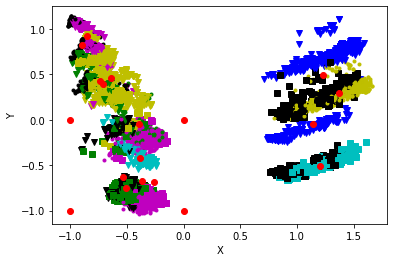

In [6]:
	#Apply PCA in training set
	dataPCATraining, var = applyPCAFit(int(rate), dataTraining)

	#Run K means in training set
	dataPCATraining = dataPCATraining.tolist()
	centers, clusters = kmeans(dataPCATraining, int(k))

	#Run in test set
	test_data,cl_test = test(dataPCATraining, centers)
	plot_data(test_data,centers,cl_test)

No gráfico, houve a superposição de vários clusters, não sendo possível distingui-los visualmente. A parte direita passou por menor clusterização quanto aparentemente seria possível. Portanto, o resultado obtido não foi satisfatório para nosso objetivo de categorizar os conteúdos.

Realizando testes com diferentes valores para redução dos dados (com o número de componentes igual a 2 e 4) e encontramos valores que melhor satisfazem visualmente a clusterização mas que podem apresentar uma falsa corretude por não observar a profundidade dos dados.

Ao utilizar 2 componentes no PCA e o número de k igual a 4, obtivemos uma clusterização sem superposição mas que ainda não satisfez todas as possibilidades de clusters observáveis no gráfico.

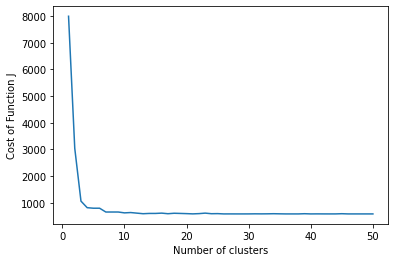

In [7]:
	#Elbow method for n = 2
	dataPCATraining, var = applyPCAFit(2, dataTraining)
	dataPCATraining = dataPCATraining.tolist()
	elbow_method(dataPCATraining, 50)

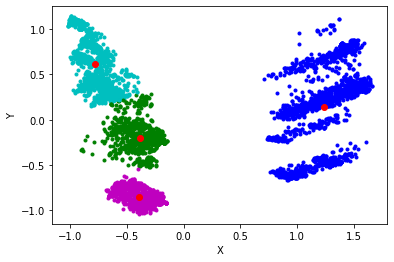

In [8]:
	#Apply PCA in training set
	dataPCATraining, var = applyPCAFit(2, dataTraining)

	#Run K means in training set
	dataPCATraining = dataPCATraining.tolist()
	centers, clusters = kmeans(dataPCATraining, 4)

	#Run in test set
	test_data,cl_test = test(dataPCATraining, centers)
	plot_data(test_data,centers,cl_test)

Ao utilizar 4 componentes no PCA e o número de k igual a 5, vemos que é realizada maior clusterização no lado esquerdo do gráfico, começando a ocorrer a superposição desses clusters.

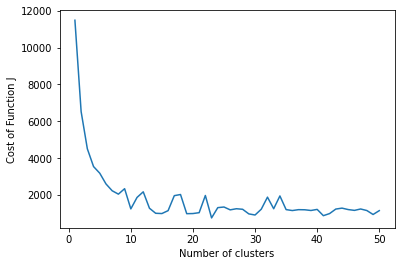

In [9]:
	#Elbow method for n = 4
	dataPCATraining, var = applyPCAFit(4, dataTraining)
	dataPCATraining = dataPCATraining.tolist()
	elbow_method(dataPCATraining, 50)

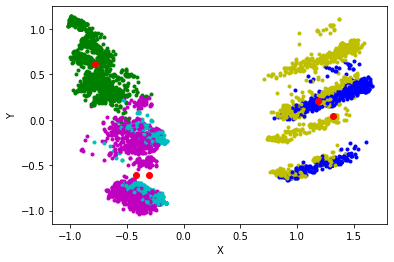

In [10]:
	#Apply PCA in training set
	dataPCATraining, var = applyPCAFit(4, dataTraining)

	#Run K means in training set
	dataPCATraining = dataPCATraining.tolist()
	centers, clusters = kmeans(dataPCATraining, 5)

	#Run in test set
	test_data,cl_test = test(dataPCATraining, centers)
	plot_data(test_data,centers,cl_test)

##### Divisão das responsabilidades
Nesse projeto, dividimos as responsabilidades da seguinte maneira:

Letícia: responsável pela implementação e análise da parte 1 (k-means, dbscan, desenvolvimento das funções comuns à todas as partes do projeto)

Felipe: responsável pela implementação e análise da parte 2 (processamento do novo conjunto de dados e implementação do PCA e integralização com o código produzido na parte 1)

Em todo momento realizamos discussões sobre os resultados  que estávamos obtendo e as decisões que deveríamos tomar. O relatório e as conclusões foram desenvolvidas em conjunto.